In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# plots to be rendered inside the notebook
%matplotlib inline

In [3]:
fuel_econ = pd.read_csv('./fuel_econ.csv')
print(fuel_econ.shape)
fuel_econ.head()

(3929, 20)


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


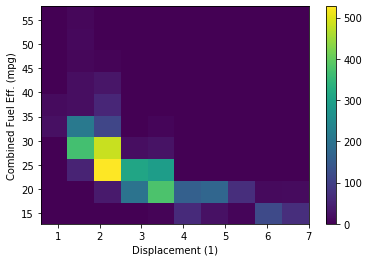

In [4]:
plt.hist2d(data=fuel_econ, x = 'displ', y = 'comb' );
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

In [7]:
fuel_econ[['displ', 'comb']].describe()

,displ,comb
count,3929.000000,3929.000000
mean,2.950573,24.791339
std,1.305901,6.003246
min,0.600000,12.821700
25%,2.000000,20.658100
50%,2.500000,24.000000
75%,3.600000,28.227100
max,7.000000,57.782400


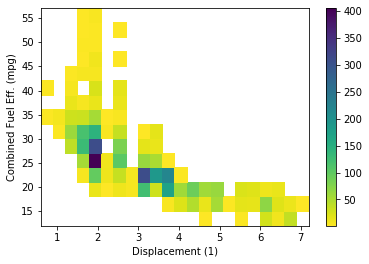

In [8]:
bins_x = np.arange(0.6, 7+0.3, 0.3)
bins_y = np.arange(12, 57+3, 3)
# we can change the colors
plt.hist2d(data=fuel_econ, x = 'displ', y = 'comb', cmin = 0.5, cmap = 'viridis_r', bins = [bins_x, bins_y ] );
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

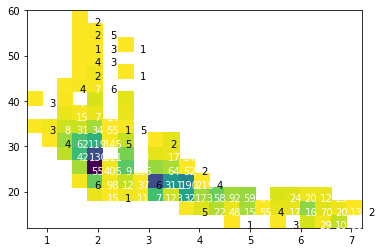

In [15]:
# If you have a lot of data, you might want to add annotations to cells in the plot indicating the count of points in each cell
bins_x = np.arange(0.6, 7+0.3, 0.3)
bins_y = np.arange(12, 58+3, 3)
# we can change the colors
h2d = plt.hist2d(data=fuel_econ, x = 'displ', y = 'comb', cmin = 0.5, cmap = 'viridis_r', bins = [bins_x, bins_y ] );
counts = h2d[0]

# loop through the cell counts and add text annotations for each
for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        if c >= 7: # increase visibility on darkest cells
            plt.text(bins_x[i]+0.5, bins_y[j]+0.5, int(c),
                     ha = 'center', va = 'center', color = 'white')
        elif c > 0:
            plt.text(bins_x[i]+0.5, bins_y[j]+0.5, int(c),
                     ha = 'center', va = 'center', color = 'black')


**Task 2**: Let's look at the relationship between two other numeric variables. How does the engine size relate to a car's CO2 footprint? The 'displ' variable has the former (in liters), while the 'co2' variable has the latter (in grams per mile). Use a heat map to depict the data. How strong is this trend?

In [16]:
fuel_econ[['displ', 'co2']].describe()

,displ,co2
count,3929.000000,3929.000000
mean,2.950573,376.564266
std,1.305901,92.338892
min,0.600000,29.000000
25%,2.000000,315.000000
50%,2.500000,369.000000
75%,3.600000,429.000000
max,7.000000,692.000000


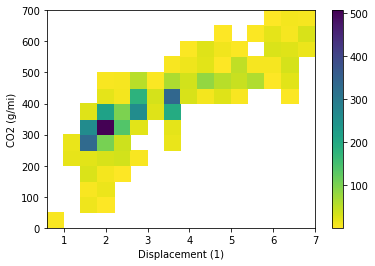

In [17]:
bins_x = np.arange(0.6, fuel_econ['displ'].max()+0.4, 0.4)
bins_y = np.arange(0, fuel_econ['co2'].max()+50, 50)
# we can change the colors
plt.hist2d(data=fuel_econ, x = 'displ', y = 'co2', cmin = 0.5, cmap = 'viridis_r', bins = [bins_x, bins_y ] );
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('CO2 (g/mi)');